<a href="https://colab.research.google.com/github/fahr-khadija/Breast-Cancer-ML/blob/main/breast_cancer_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error
from google.colab import files

# Needed to show plots inline for notebooks
%matplotlib inline

In [2]:
data=files.upload()

Saving breast_cancer_data_load.csv to breast_cancer_data_load.csv


In [3]:
pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.19.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.3
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c

# ** Workflow diagram**
1.    **Step 1: Dataset  collection (from Sql)**
2.   **Step 2: Preprocessing data  use preproc function already implemented**
3.  **Step 3: EDA "Exploratory data Analysis" on 3 models (DNN , SVM ,..)**
4.  **Step 4: Comparison  Performance on 3 models  and save the best model ****






In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
breast_cancer_df = pd.read_csv('breast_cancer_data_load.csv')
# Review the DataFrame
breast_cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [5]:
breast_cancer_df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
345        10.26         14.71           66.20      321.6          0.09882   
346        12.06         18.90           76.66      445.3          0.08386   
347        14.76         14.74           94.87      668.7          0.08875   
348        11.47         16.03           73.02      402.7          0.09076   
349        11.95         14.96           77.23      426.7          0.11580   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
345           0.09159         0.03581             0.020370         0.1633   
346           0.05794         0.00751             0.008488         0.1555   
347           0.07780         0.04608             0.035280         0.1521   
348           0.05886         0.02587             0.023220         0.1634   
349           0.12060         0.01171             0.017870         0.2459   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
345                 0.07005  ...          19.48            70.89       357.1   
346                 0.06048  ...          27.06            86.54       562.6   
347                 0.05912  ...          17.93           114.20       880.8   
348                 0.06372  ...          20.79            79.67       475.8   
349                 0.06581  ...          17.72            83.09       496.2   

     worst smoothness  worst compactness  worst concavity  \
345            0.1360             0.1636          0.07162   
346            0.1289             0.1352          0.04506   
347            0.1220             0.2009          0.21510   
348            0.1531             0.1120          0.09823   
349            0.1293             0.1885          0.03122   

     worst concave points  worst symmetry  worst fractal dimension  target  
345               0.04074          0.2434                  0.08488       1  
346               0.05093          0.2880                  0.08083       1  
347               0.12510          0.3109                  0.08187       1  
348               0.06548          0.2851                  0.08763       1  
349               0.04766          0.3124                  0.07590       1  

[5 rows x 31 columns]

In [6]:
breast_cancer_df.info(31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              350 non-null    float64
 1   mean texture             350 non-null    float64
 2   mean perimeter           350 non-null    float64
 3   mean area                350 non-null    float64
 4   mean smoothness          350 non-null    float64
 5   mean compactness         350 non-null    float64
 6   mean concavity           350 non-null    float64
 7   mean concave points      350 non-null    float64
 8   mean symmetry            350 non-null    float64
 9   mean fractal dimension   350 non-null    float64
 10  radius error             350 non-null    float64
 11  texture error            350 non-null    float64
 12  perimeter error          350 non-null    float64
 13  area error               350 non-null    float64
 14  smoothness error         3

In [7]:
breast_cancer_df.describe()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   350.000000    350.000000      350.000000   350.00000       350.000000   
mean     14.317489     19.052000       93.315600   672.35200         0.097481   
std       3.540724      4.191964       24.410961   352.23532         0.013806   
min       6.981000      9.710000       43.790000   143.50000         0.062510   
25%      11.802500     15.902500       75.582500   428.22500         0.087630   
50%      13.535000     18.785000       87.350000   564.20000         0.097220   
75%      16.267500     21.590000      108.700000   824.52500         0.106475   
max      28.110000     39.280000      188.500000  2499.00000         0.144700   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        350.000000      350.000000           350.000000     350.000000   
mean           0.107389        0.094595             0.052039       0.183898   
std            0.055371        0.082214             0.039403       0.029063   
min            0.019380        0.000000             0.000000       0.116700   
25%            0.066713        0.030090             0.020815       0.163575   
50%            0.096425        0.070885             0.037860       0.181450   
75%            0.133825        0.138350             0.079507       0.196700   
max            0.345400        0.426800             0.201200       0.304000   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count              350.000000  ...     350.000000       350.000000   
mean                 0.062892  ...      25.498343       109.592571   
std                  0.007299  ...       6.259880        34.129851   
min                  0.049960  ...      12.020000        50.410000   
25%                  0.057693  ...      20.865000        84.367500   
50%                  0.061445  ...      25.210000       100.700000   
75%                  0.066263  ...      29.667500       129.600000   
max                  0.097440  ...      49.540000       220.800000   

        worst area  worst smoothness  worst compactness  worst concavity  \
count   350.000000        350.000000         350.000000       350.000000   
mean    919.567714          0.134109           0.263835         0.284621   
std     572.105221          0.023173           0.167869         0.215649   
min     185.200000          0.071170           0.027290         0.000000   
25%     521.550000          0.118425           0.143400         0.106675   
50%     713.450000          0.134000           0.220200         0.243300   
75%    1225.250000          0.149100           0.357325         0.397325   
max    3432.000000          0.222600           1.058000         1.252000   

       worst concave points  worst symmetry  worst fractal dimension  \
count            350.000000      350.000000               350.000000   
mean               0.119690        0.298080                 0.084847   
std                0.067676        0.068333                 0.019373   
min                0.000000        0.156500                 0.055040   
25%                0.063010        0.256475                 0.071557   
50%                0.109900        0.287900                 0.080745   
75%                0.173075        0.327225                 0.092813   
max                0.291000        0.663800                 0.207500   

           target  
count  350.000000  
mean     0.548571  
std      0.498348  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 31 columns]

# **Data Description**

The dataframe has 350 rows and 31 columns that reprent breast cancer  dataset .

In [8]:
# List of columns names
columns= breast_cancer_df.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

 radius',  texture', ' perimeter', ' area',
       ' smoothness', ' compactness', 'concavity',
       ' concave points', ' symmetry', ' fractal dimension'

In [9]:
# Count the number of null values in the dataframe
breast_cancer_df.isnull().sum().sum()

0

In [10]:
breast_cancer_df.groupby('target').mean()

mean radius  mean texture  mean perimeter   mean area  \
target                                                          
0         17.131772     21.404747      113.064304  940.807595   
1         12.001568     17.115885       77.064062  451.435417   

        mean smoothness  mean compactness  mean concavity  \
target                                                      
0              0.102952          0.143613        0.154053   
1              0.092979          0.077580        0.045666   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                              ...   
0                  0.084930       0.194147                0.062820  ...   
1                  0.024972       0.175463                0.062951  ...   

        worst radius  worst texture  worst perimeter   worst area  \
target                                                              
0          20.816519      29.245570       138.930696  1377.765190   
1          13.183406      22.414687        85.449740   542.509375   

        worst smoothness  worst compactness  worst concavity  \
target                                                         
0               0.145499           0.375159         0.438350   
1               0.124736           0.172225         0.158114   

        worst concave points  worst symmetry  worst fractal dimension  
target                                                                 
0                   0.178783        0.330028                 0.092311  
1                   0.071061        0.271790                 0.078704  

[2 rows x 30 columns]

In [11]:
breast_cancer_df.groupby('target').max()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
target                                                                          
0             28.11         39.28           188.5     2499.0           0.1447   
1             16.84         33.81           108.4      880.2           0.1291   

        mean compactness  mean concavity  mean concave points  mean symmetry  \
target                                                                         
0                 0.3454          0.4268              0.20120         0.3040   
1                 0.2233          0.4108              0.08534         0.2743   

        mean fractal dimension  ...  worst radius  worst texture  \
target                          ...                                
0                      0.09744  ...         33.12          49.54   
1                      0.09296  ...         18.22          41.78   

        worst perimeter  worst area  worst smoothness  worst compactness  \
target                                                                     
0                 220.8      3432.0            0.2226             1.0580   
1                 120.3      1032.0            0.1733             0.5849   

        worst concavity  worst concave points  worst symmetry  \
target                                                          
0                 1.105                 0.291          0.6638   
1                 1.252                 0.175          0.4228   

        worst fractal dimension  
target                           
0                        0.2075  
1                        0.1486  

[2 rows x 30 columns]

In [12]:
breast_cancer_df.groupby('target').min()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
target                                                                          
0            10.950         10.38           71.90      371.1          0.07371   
1             6.981          9.71           43.79      143.5          0.06251   

        mean compactness  mean concavity  mean concave points  mean symmetry  \
target                                                                         
0                0.05131         0.02398              0.02031         0.1308   
1                0.01938         0.00000              0.00000         0.1167   

        mean fractal dimension  ...  worst radius  worst texture  \
target                          ...                                
0                      0.04996  ...         12.84          16.67   
1                      0.05234  ...          7.93          12.02   

        worst perimeter  worst area  worst smoothness  worst compactness  \
target                                                                     
0                 85.10       514.0           0.08822            0.05131   
1                 50.41       185.2           0.07117            0.02729   

        worst concavity  worst concave points  worst symmetry  \
target                                                          
0               0.02398               0.02899          0.1565   
1               0.00000               0.00000          0.1652   

        worst fractal dimension  
target                           
0                       0.05504  
1                       0.05695  

[2 rows x 30 columns]

In [13]:
# Determine the number of unique values in each column to understand the diversity of values in each feature of our dataset.
for x in breast_cancer_df.columns:
    print(x, len(breast_cancer_df[x].unique()))

mean radius 301
mean texture 320
mean perimeter 330
mean area 334
mean smoothness 300
mean compactness 337
mean concavity 338
mean concave points 339
mean symmetry 296
mean fractal dimension 322
radius error 342
texture error 331
perimeter error 335
area error 337
smoothness error 338
compactness error 343
concavity error 334
concave points error 324
symmetry error 323
fractal dimension error 338
worst radius 299
worst texture 326
worst perimeter 327
worst area 340
worst smoothness 283
worst compactness 338
worst concavity 338
worst concave points 321
worst symmetry 322
worst fractal dimension 336
target 2


In [14]:
 #determine the number of unique values in each column of the DataFrame
breast_cancer_df.nunique()

mean radius                301
mean texture               320
mean perimeter             330
mean area                  334
mean smoothness            300
mean compactness           337
mean concavity             338
mean concave points        339
mean symmetry              296
mean fractal dimension     322
radius error               342
texture error              331
perimeter error            335
area error                 337
smoothness error           338
compactness error          343
concavity error            334
concave points error       324
symmetry error             323
fractal dimension error    338
worst radius               299
worst texture              326
worst perimeter            327
worst area                 340
worst smoothness           283
worst compactness          338
worst concavity            338
worst concave points       321
worst symmetry             322
worst fractal dimension    336
target                       2
dtype: int64

# Visualize the dataset using seaborn, matplotlib and pandas
# Try to find the correlation between the features

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>,
        <Axes: xlabel='mean compactness', ylabel='mean radius'>,
        <Axes: xlabel='mean concavity', ylabel='mean radius'>,
        <Axes: xlabel='mean concave points', ylabel='mean radius'>,
        <Axes: xlabel='mean symmetry', ylabel='mean radius'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='mean texture'>,
        <Axes: xlabel='mean texture', ylabel='mean texture'>,
        <Axes: xlabel='mean area', ylabel='mean texture'>,
        <Axes: xlabel='mean perimeter', ylabel='mean texture'>,
        <Axes: xlabel='mean smoothness', ylabel='mean texture'>,
        <Axes: xlabel='mean compactness', ylabel='mea

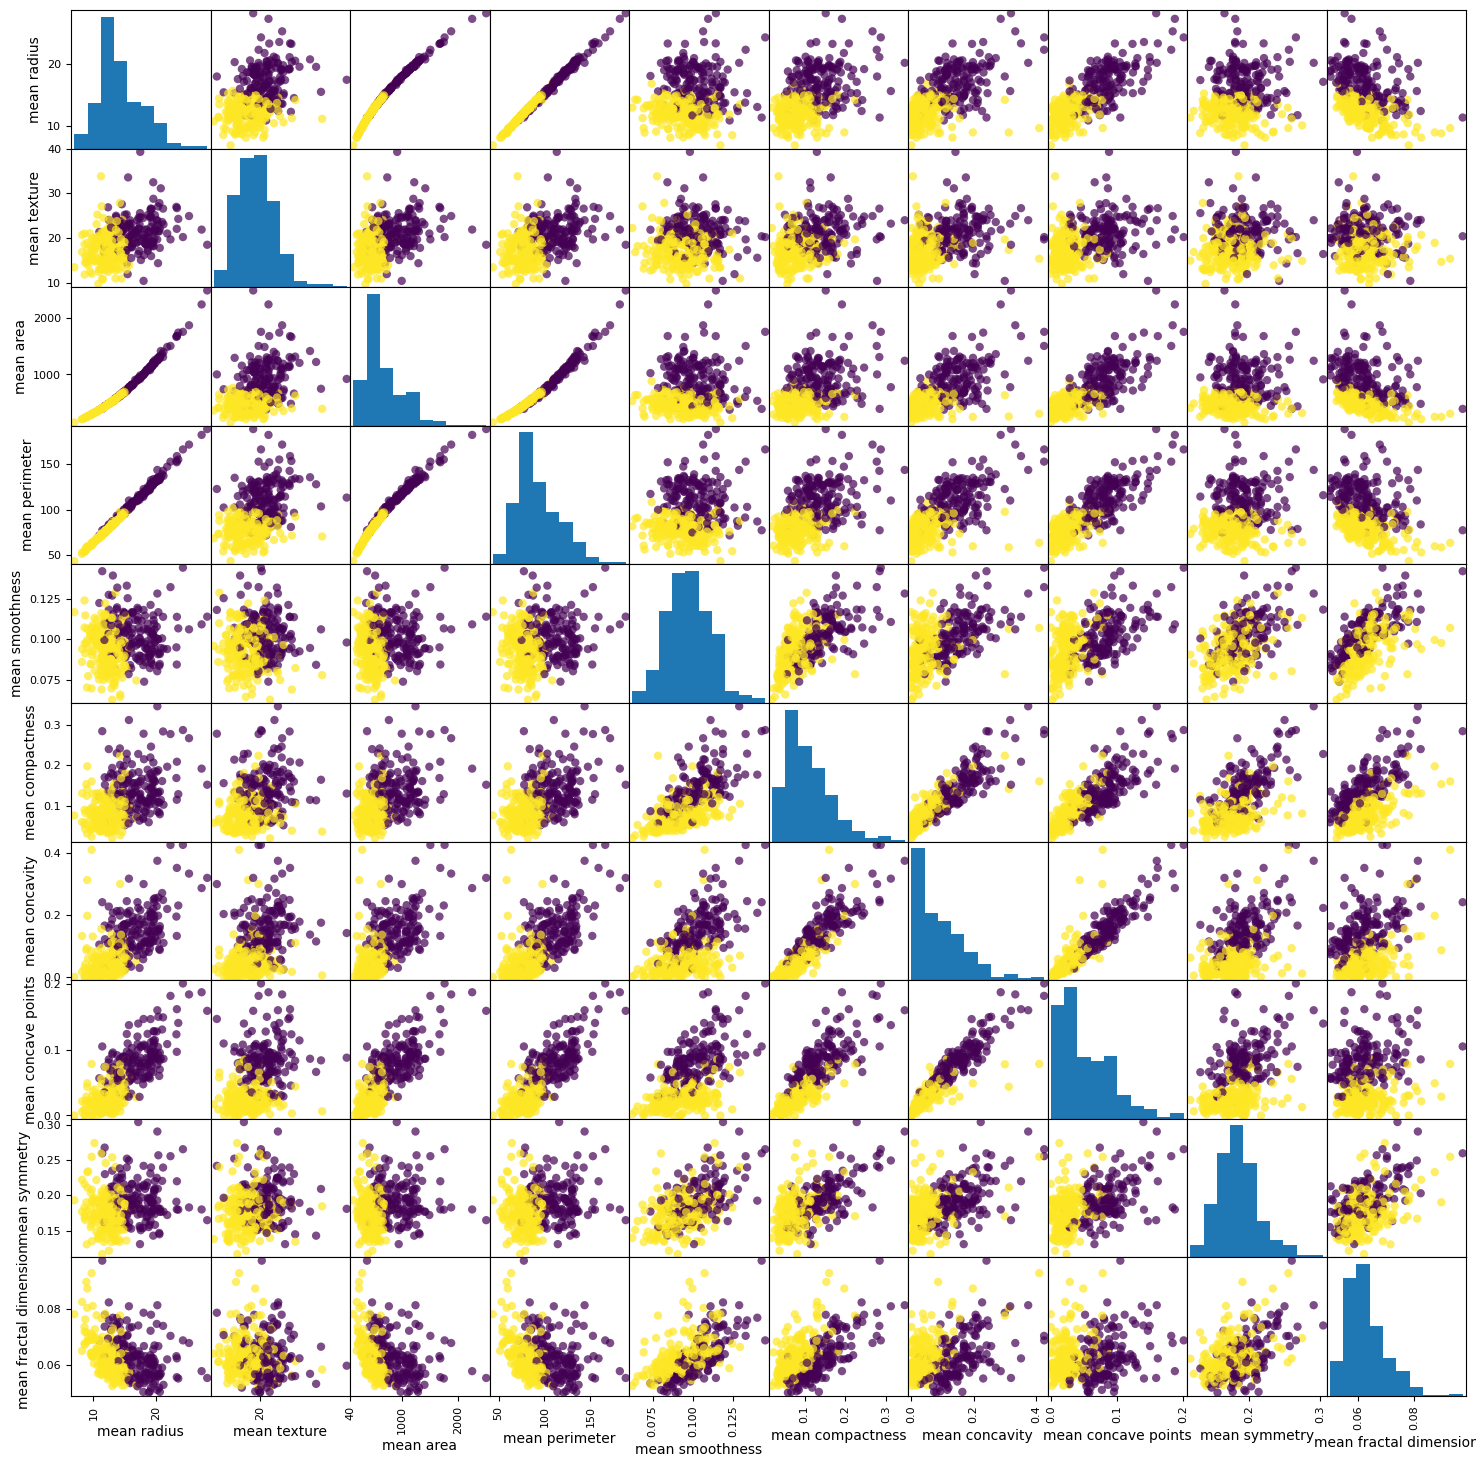

In [15]:
from pandas.plotting import scatter_matrix
# List of valid column names
attributes = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Create a scatter matrix
scatter_matrix(breast_cancer_df[attributes], figsize=(18, 18), c=breast_cancer_df['target'], marker='o', alpha=0.7)


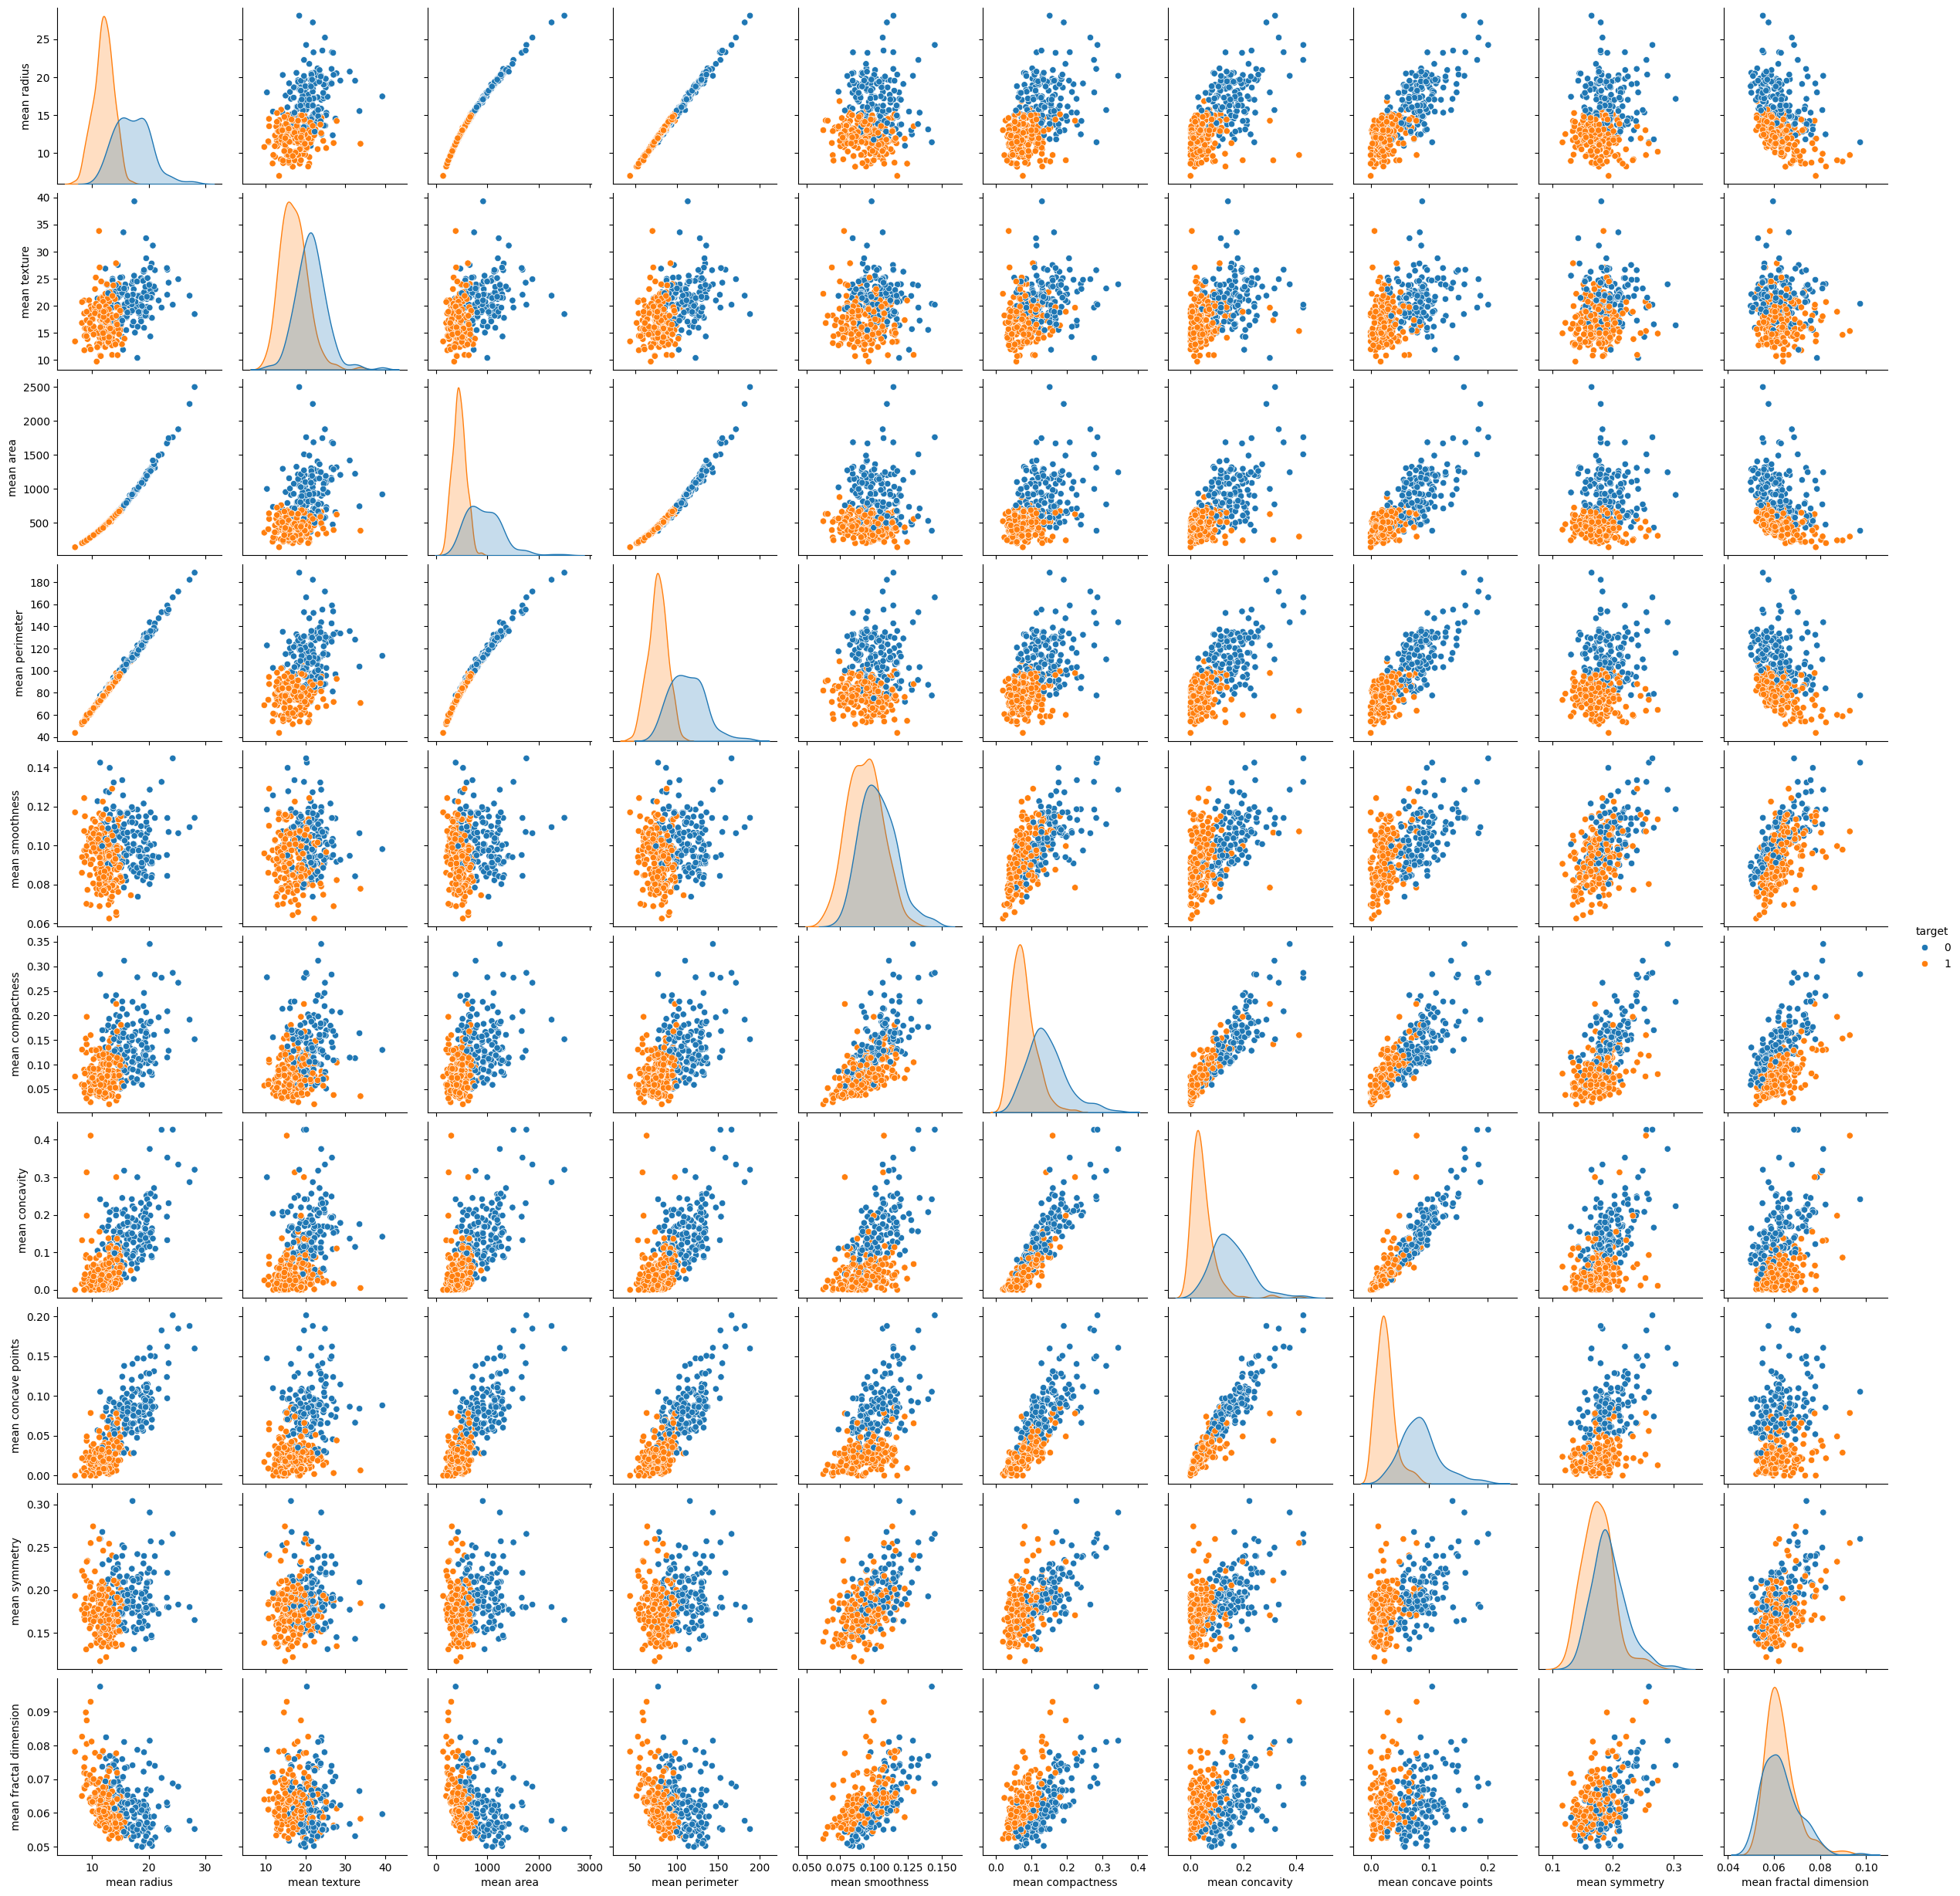

In [16]:
# Create a pairplot
sns.pairplot(breast_cancer_df, hue="target", vars=attributes)


In comparing the features of radius_mean in relation to the diagnosis type we see that Benign type has the highest number of radius_mean values.

When it comes to radius_se there are two value outliers in our malignant value as most values fall below 2.0 value.

How many Benign and Malignant do we have in our dataset?

<Axes: >

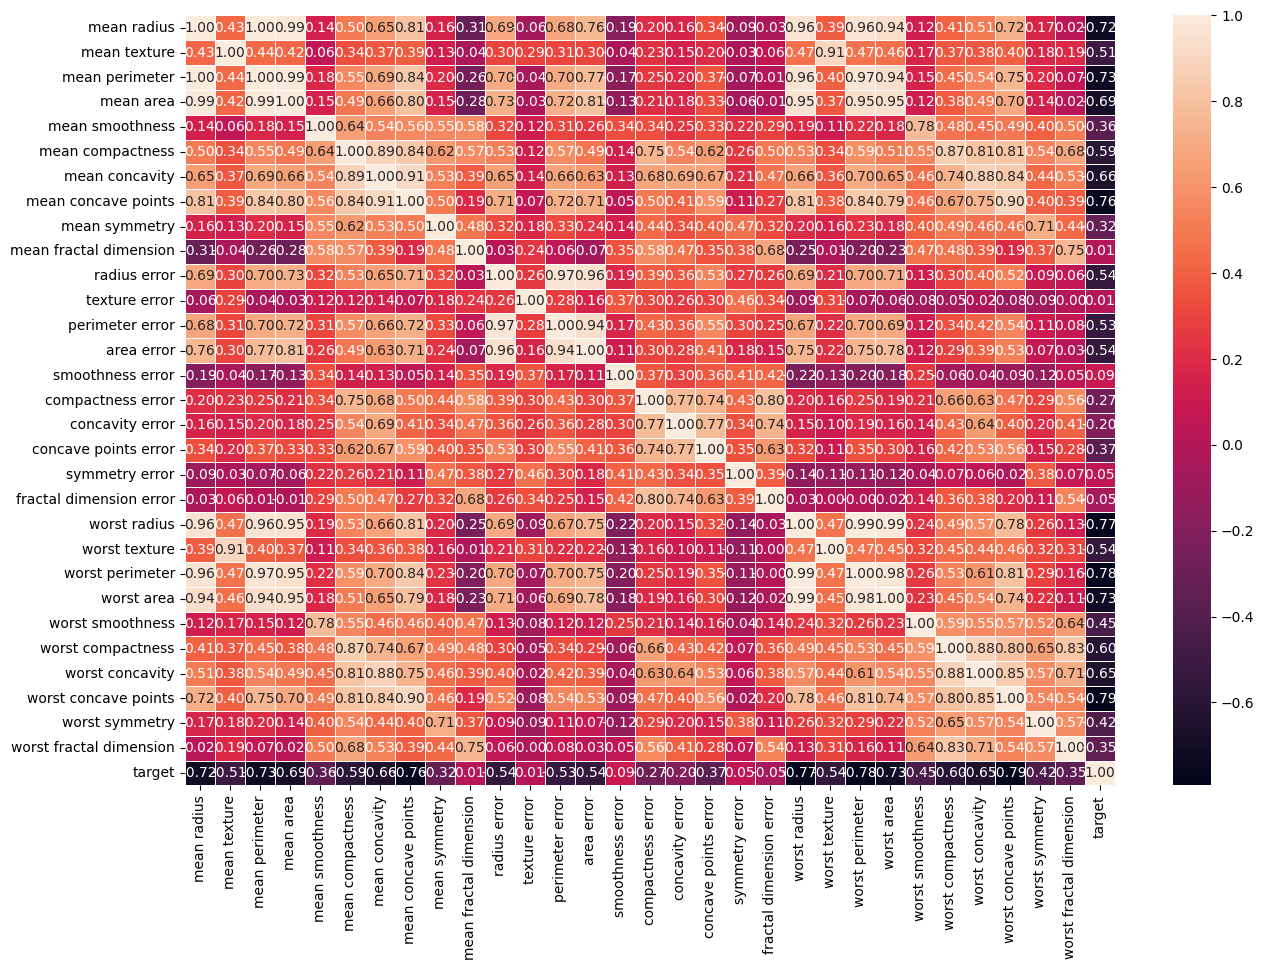

In [35]:
#Getting to view the Correllation on our data set
plt.figure(figsize=(15,10))
sns.heatmap(breast_cancer_df.corr(),annot=True ,fmt=".2f",annot_kws={"size":10},linewidths=.7)

# Heatmap generation for data correlation

From our correlation matrix where there is a large positive near to 1.0 it indicates a strong positive correlation. Meaning when a value of one of the feature increases, the value of the other will increase as well.or while a value near to 0 indicates the absence of any correlation between the two features ,they are independent of each other.
In our case we can easly found a strong correlation between mean ,worst and error of radius ,area and perimeter  which is normal because all are about the size of tumor ,
Also we see that
Or they are no correlation between texture &smoothness feature and all others features cause the texture&smoothness are another aspect of tumor independatly of size and form , more relevant to the quality of cell.

In [18]:
breast_cancer_df['target'].value_counts()

1    192
0    158
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

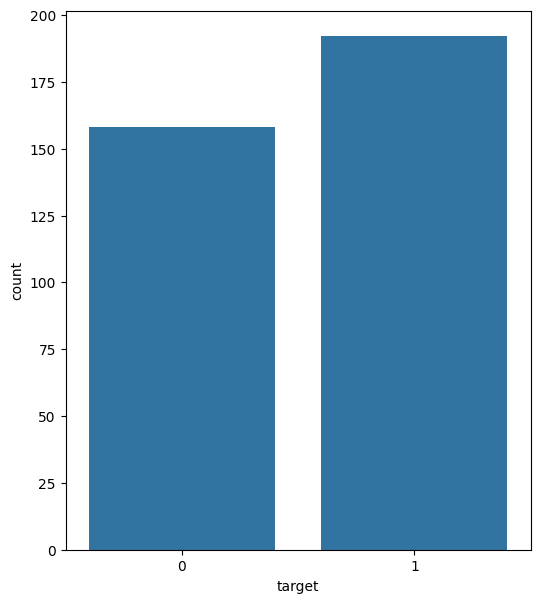

In [19]:
# Let's print out countplot of the target  to visualize the number of persons have a cancer or not
plt.figure(figsize = (6,7))
sns.countplot(breast_cancer_df, x="target")

**Here we want to split our data where a part of it (X_train,y_train) we use it for training our model to understand our dataset and the rest (X_test,y_test)we use it in evaluating(test) how best our model performs in predicting the outcome which the metric will be in it’s accuracy to predict.**

In [20]:
#Train ,test , split the  Dataframe breast_cancer_df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split our preprocessed data into our features and target arrays

y = breast_cancer_df['target'].values
# drop 'target'
X = breast_cancer_df.drop('target', axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# **Model1 DNN "Deep Neural Network"**

1.   Compile, Train and Evaluate the Model
2.   Optimize the model


In [22]:
import tensorflow as tf

# Define the model - deep neural net, the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=40
hidden_nodes_layer2=20

model1 = tf.keras.models.Sequential()

# First hidden layer
model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

# Output layer
model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1240      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [24]:
# Train the model
fit_model=model1.fit(X_train_scaled,y_train,validation_split=0.40, epochs=30)

Epoch 1/30
5/5 [==============================] - 1s 59ms/step - loss: 0.5242 - accuracy: 0.7834 - val_loss: 0.4512 - val_accuracy: 0.8762
Epoch 2/30
5/5 [==============================] - 0s 14ms/step - loss: 0.4278 - accuracy: 0.8726 - val_loss: 0.3832 - val_accuracy: 0.8952
Epoch 3/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3542 - accuracy: 0.9045 - val_loss: 0.3325 - val_accuracy: 0.8952
Epoch 4/30
5/5 [==============================] - 0s 12ms/step - loss: 0.3002 - accuracy: 0.9172 - val_loss: 0.2941 - val_accuracy: 0.9048
Epoch 5/30
5/5 [==============================] - 0s 14ms/step - loss: 0.2582 - accuracy: 0.9236 - val_loss: 0.2654 - val_accuracy: 0.9048
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.2265 - accuracy: 0.9299 - val_loss: 0.2429 - val_accuracy: 0.9048
Epoch 7/30
5/5 [==============================] - 0s 13ms/step - loss: 0.2006 - accuracy: 0.9490 - val_loss: 0.2241 - val_accuracy: 0.9333
Epoch 8/30
5/5 [===========

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.1441 - accuracy: 0.9432 - 23ms/epoch - 8ms/step
Loss: 0.14407923817634583, Accuracy: 0.9431818127632141


In [26]:
# Evaluate the model using the train data
model_loss, model_accuracy = model1.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0606 - accuracy: 0.9885 - 30ms/epoch - 3ms/step
Loss: 0.06059831753373146, Accuracy: 0.9885495901107788


In [27]:
#optimisation 1
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30
hidden_nodes_layer3=21

model2 = tf.keras.models.Sequential()

# First hidden layer
model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                2480      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4941 (19.30 KB)
Trainable params: 4941 (19.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [29]:
# Train the model
fit_model=model2.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 50ms/step - loss: 0.7644 - accuracy: 0.3559 - val_loss: 0.6444 - val_accuracy: 0.6750
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5386 - accuracy: 0.8604 - val_loss: 0.4427 - val_accuracy: 0.9750
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3924 - accuracy: 0.9414 - val_loss: 0.3084 - val_accuracy: 0.9750
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.2977 - accuracy: 0.9505 - val_loss: 0.2189 - val_accuracy: 0.9750
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.2330 - accuracy: 0.9505 - val_loss: 0.1594 - val_accuracy: 0.9750
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1881 - accuracy: 0.9550 - val_loss: 0.1226 - val_accuracy: 0.9750
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1555 - accuracy: 0.9685 - val_loss: 0.0988 - val_accuracy: 0.9750
Epoch 8/100
7/7 [===

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.3758 - accuracy: 0.9318 - 25ms/epoch - 8ms/step
Loss: 0.3757815659046173, Accuracy: 0.9318181872367859


In [31]:
# Evaluate the model using the train data
model_loss, model_accuracy = model2.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0032 - accuracy: 1.0000 - 30ms/epoch - 3ms/step
Loss: 0.0032152915373444557, Accuracy: 1.0


Report Analysis
The second optimisation  demonstrates a more significant improvement in terms of both loss and accuracy compared to the first one.It achieved a perfect accuracy of 100% and a much lower loss  0.0037.


In [32]:
# Export our model to HDF5 file
from google.colab import files

model2.save('/content/Model_NN.h5')
files.download('/content/Model_NN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# **Model2 SVM "Support Vector Machines"**

1.   Compile, Train and Evaluate the Model
2.   Optimize the model

In [33]:
#Train ,test , split the  Dataframe breast_cancer_df
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
# Split our preprocessed data into our features and target arrays
y = breast_cancer_df['target'].values
# drop 'target'
X = breast_cancer_df.drop('target', axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler#
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Create an SVM model
svm_model=SVC()
# Compile and train the model
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

In [38]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy on the test set: {accuracy}')
print('Classification Report:')
print(classification_report_result)


Accuracy on the test set: 0.9318181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.96      0.91      0.93        47

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



<Axes: >

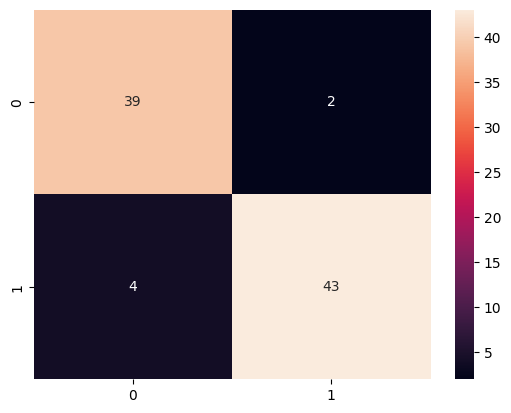

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

y_predict = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [40]:
# Make predictions on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred)

# Print the results for the training set
print(f'Accuracy on the training set: {accuracy_train}')
print('Classification Report for the training set:')
print(classification_report_train)


Accuracy on the training set: 0.9847328244274809
Classification Report for the training set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       117
           1       0.98      0.99      0.99       145

    accuracy                           0.98       262
   macro avg       0.99      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



In [41]:
#Optimisation
#Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.954 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.557 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.552 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.557 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.552 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.552 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear

In [42]:

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

# Print the results for the best model
print(f'Best model parameters: {best_params}')
print(f'Accuracy of the best model on the test set: {accuracy_best}')
print('Classification Report for the best model:')
print(classification_report_best)


Best model parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy of the best model on the test set: 0.9431818181818182
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.96      0.94      0.95        47

    accuracy                           0.94        88
   macro avg       0.94      0.94      0.94        88
weighted avg       0.94      0.94      0.94        88



In [43]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svm_model,param_grid,refit=True,verbose=4)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=0.001, kernel=linear;, score=0.954 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.557 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.552 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.552 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.557 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.552 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.552 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear

In [44]:
# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

# Print the results for the best model
print(f'Best model parameters: {best_params}')
print(f'Accuracy of the best model on the test set: {accuracy_best}')
print('Classification Report for the best model:')
print(classification_report_best)


Best model parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy of the best model on the test set: 0.9431818181818182
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.96      0.94      0.95        47

    accuracy                           0.94        88
   macro avg       0.94      0.94      0.94        88
weighted avg       0.94      0.94      0.94        88



<Axes: >

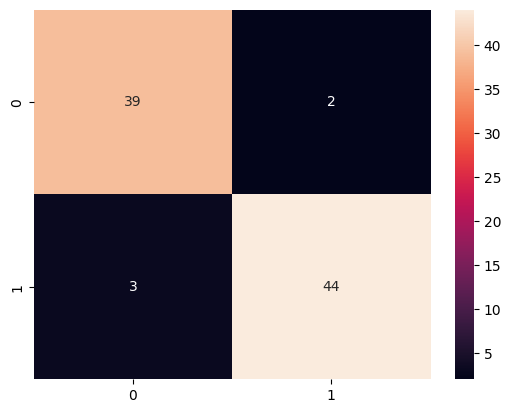

In [45]:
grid_predictions = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [46]:
# Make predictions on the training set using the best model
y_pred_train_best = best_model.predict(X_train_scaled)

# Evaluate the best model on the training set
accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
classification_report_train_best = classification_report(y_train, y_pred_train_best)

# Print the results for the best model on the training set
print(f'Best model parameters: {best_params}')
print(f'Accuracy of the best model on the training set: {accuracy_train_best}')
print('Classification Report for the best model on the training set:')
print(classification_report_train_best)

Best model parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy of the best model on the training set: 0.9923664122137404
Classification Report for the best model on the training set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       117
           1       0.99      1.00      0.99       145

    accuracy                           0.99       262
   macro avg       0.99      0.99      0.99       262
weighted avg       0.99      0.99      0.99       262



In [47]:
!pip install joblib

In [48]:
# Import joblib
import joblib

# Save the model in Colab
joblib.dump(best_model, '/content/best_svm_model.pkl')

# Download the model file
files.download('/content/best_svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Report Analysis:

1.   **The accuracy on the training set increased from 98.47% to 99.24% after optimization.The precision, recall, and F1-score for both classes (0 and 1) are excellent, showing high performance.**
2.   **The optimization model now achieves near-perfect accuracy, precision, recall, and F1-score for both classes. This indicates that the model has successfully learned the patterns in the training data and generalizes well to it**






# **Model3**
CTE of model and optimisation

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Define the model - Using KNN

Module3 = KNeighborsClassifier(n_neighbors=1)

In [51]:
Module3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
pre_module3 =Module3.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

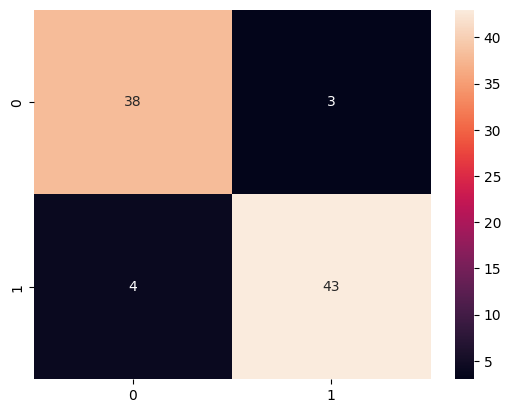

In [54]:
cm =confusion_matrix(y_test,pre_module3)
sns.heatmap(cm, annot=True)

In [55]:
print(classification_report(y_test,pre_module3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.93      0.91      0.92        47

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



In [56]:
pre_module3 =Module3.predict(X_train)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
 # Create and print the training classification report
print(classification_report(y_train,pre_module3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       145

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262

